In [142]:
# 📦 Importing core data handling and visualization libraries
import pandas as pd                          # For loading and manipulating data (DataFrames)
import matplotlib.pyplot as plt              # For creating basic static plots
import seaborn as sns                        # For more advanced and stylish plots

# 🤖 Importing ML tools from scikit-learn
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier   # Random Forest - the classification algorithm we'll use
from sklearn.multioutput import MultiOutputClassifier # To handle multiple output labels (e.g., multiple pumps)

from sklearn.metrics import classification_report     # For evaluating model performance with precision, recall, etc.

# 🛠️ Utility tools
from sklearn.preprocessing import MinMaxScaler        # To normalize/scale features so all values are in the same range
import joblib                                         # To save and load ML models (for later use or deployment)


In [143]:
# 📄 Load the dataset into a pandas DataFrame
# Make sure the CSV file is in the same folder or provide the correct path
df = pd.read_csv("irrigation_machine.csv")  # Replace with actual file name if different

In [144]:
# 👀 View the first 5 rows of the dataset to understand its structure and content
df.head()

# (You mentioned df.tail() in the comment — that would show the last 5 rows instead)
# If needed, you can also use: df.tail()  # To see the last 5 rows


,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [145]:
# 📋 Get a concise summary of the DataFrame
# Shows column names, data types, number of non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [146]:
# 📑 Display a list of all column names in the dataset
# Useful for checking sensor and parcel names or spotting unnecessary columns
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [147]:
# 🧹 Drop the unnecessary column 'Unnamed: 0'
# This column usually appears when a CSV file includes the index column during export
# axis=1 means you're dropping a column (axis=0 would be for rows)
df = df.drop('Unnamed: 0', axis=1, errors='ignore')

# 🔁 Check the first 5 rows again to confirm the column was removed successfully
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [148]:
# 📊 Generate summary statistics of all numeric columns in the dataset
# Includes: count, mean, std deviation, min, 25%, 50%, 75%, and max
df.describe()

# Helps spot outliers, data ranges, and whether scaling/normalization might be needed

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [149]:

# 🎯 X (Features): Selecting sensor data (columns 0 to 19)
# These are the inputs used by the model to make predictions
X = df.iloc[:, 0:20]

# 🎯 y (Labels/Targets): Selecting parcel data (columns 20 onward)
# These are the outputs the model will learn to predict
y = df.iloc[:, 20:]

In [150]:
# 🔍 View 10 random rows from the features (X) to inspect the sensor data
# Useful for checking if values look reasonable and varied
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
16,3.0,0.0,2.0,4.0,1.0,0.0,3.0,4.0,0.0,6.0,1.0,1.0,3.0,4.0,4.0,2.0,4.0,1.0,3.0,4.0
599,0.0,1.0,2.0,4.0,3.0,3.0,5.0,4.0,1.0,2.0,4.0,4.0,5.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0
1490,0.0,2.0,4.0,5.0,3.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,7.0,7.0,5.0,0.0,0.0,0.0,3.0,2.0
691,2.0,2.0,6.0,0.0,1.0,0.0,0.0,5.0,2.0,1.0,7.0,9.0,7.0,5.0,4.0,1.0,1.0,0.0,3.0,3.0
1128,1.0,1.0,0.0,2.0,4.0,0.0,2.0,2.0,0.0,4.0,4.0,4.0,5.0,4.0,8.0,2.0,3.0,1.0,3.0,2.0
1549,2.0,4.0,2.0,4.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,9.0,6.0,6.0,2.0,2.0,0.0,0.0,2.0,2.0
20,1.0,0.0,5.0,0.0,5.0,2.0,7.0,4.0,0.0,1.0,2.0,2.0,10.0,1.0,3.0,2.0,4.0,4.0,2.0,1.0
474,2.0,2.0,2.0,1.0,3.0,0.0,5.0,4.0,1.0,0.0,4.0,6.0,5.0,6.0,3.0,3.0,4.0,2.0,3.0,4.0
1882,1.0,1.0,2.0,2.0,6.0,3.0,5.0,3.0,5.0,3.0,5.0,2.0,8.0,2.0,2.0,1.0,2.0,6.0,4.0,3.0
791,2.0,2.0,3.0,2.0,4.0,3.0,4.0,0.0,2.0,0.0,8.0,2.0,5.0,1.0,4.0,1.0,3.0,2.0,4.0,4.0


In [151]:
# 🔍 View 10 random rows from the labels (y) to inspect the parcel outputs
# Helps verify the label distribution and format
y.sample(10)

,parcel_0,parcel_1,parcel_2
520,1,1,0
1223,0,0,0
1911,1,1,0
121,0,0,0
161,1,1,0
338,1,0,0
181,1,1,1
685,1,1,0
1724,0,0,0
184,1,1,0


In [152]:
# 🧠 Check the structure of the features (X)
# Shows number of entries, column types, and memory usage — helps verify all sensors are numeric
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [153]:
# 🏷️ Check the structure of the labels (y)
# Useful for confirming how many parcel columns there are and ensuring they’re of correct type (e.g., int64)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [154]:
# 👀 Display the entire features DataFrame (X)
# Helps get a complete view of all sensor data — use with caution on large datasets!
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [155]:
# 📏 Check the shape (rows, columns) of features and labels
# Useful to confirm data alignment — number of rows should be equal in both
X.shape, y.shape

((2000, 20), (2000, 3))

In [156]:
# Import MinMaxScaler to scale all features between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler on the feature matrix X and transform the values
X_scaled = scaler.fit_transform(X)

# View the scaled feature matrix
X_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]], shape=(2000, 20))

In [157]:
# Optional: View the scaled DataFrame with original column names
pd.DataFrame(X_scaled, columns=X.columns).head()


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,0.125,0.222222,0.1,0.636364,0.000000,0.142857,0.076923,0.333333,0.000,0.333333,0.1,0.250000,0.400000,0.727273,0.090909,0.000000,0.2,0.090909,0.9,0.285714
1,0.625,0.111111,0.3,0.454545,0.166667,0.285714,0.076923,0.166667,0.375,0.111111,0.3,0.166667,0.133333,0.363636,0.454545,0.833333,0.2,0.181818,0.2,1.000000
2,0.375,0.111111,0.4,0.272727,0.333333,0.000000,0.076923,0.500000,0.000,0.222222,0.3,0.166667,0.266667,0.272727,0.272727,0.166667,0.0,0.272727,0.1,0.000000
3,0.250,0.222222,0.4,0.272727,0.416667,0.000000,0.230769,0.166667,0.250,0.555556,0.3,0.083333,0.133333,0.363636,0.090909,0.166667,0.4,0.090909,0.3,0.285714
4,0.500,0.333333,0.3,0.181818,0.416667,0.142857,0.230769,0.083333,0.125,0.222222,0.4,0.416667,0.200000,0.090909,0.272727,0.333333,0.2,0.090909,0.1,0.000000


In [158]:
# --- Split data into train and test sets (80% train, 20% test) ---

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,     # Scaled feature matrix for model input
    y,            # Corresponding target labels (irrigation needs)
    test_size=0.2,    # Reserve 20% of the data for testing model performance
    random_state=42   # Ensures results are reproducible across runs
)

# Now X_train/y_train will be used to train the model, X_test/y_test for evaluation.


In [159]:
# Display the shapes (number of rows and columns) of train and test sets.
# Helps ensure that splitting was correct and that feature/target alignment is maintained.
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 20), (400, 20), (1600, 3), (400, 3))

In [160]:
# --- Train Random Forest Classifier for Multi-Label Irrigation Prediction ---

# Import required classes (re-imports are safe here for cell independence, skip if already run above)
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Instantiate Random Forest with chosen hyperparameters for balanced performance and generalization
rf = RandomForestClassifier(
    n_estimators=200,         # Number of decision trees in the forest
    max_depth=10,             # Limits each tree's depth to prevent overfitting
    min_samples_split=4,      # Minimum samples required to split an internal node
    min_samples_leaf=2,       # Minimum samples at each leaf node
    max_features='sqrt',      # Use square root of n_features at each split (standard for classification)
    random_state=42           # Reproducibility of results
)

# Wrap in MultiOutputClassifier to handle multi-label (multi-parcel) binary targets (one per irrigation motor)
model = MultiOutputClassifier(rf)

# Fit the classifier to your training data
model.fit(X_train, y_train)    # Trains model on training features and corresponding true labels

# After this, your model will be ready for evaluation and prediction!


,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [161]:
# -------------------------------
#  EVALUATE MODEL
# -------------------------------
# Predict the labels for the test set using the trained model
y_pred = model.predict(X_test)

# Print classification metrics for each label (parcel)
print("Classification Report:")
print(
    classification_report(
        y_test,                # True labels for the test set
        y_pred,                # Model's predicted labels
        target_names=y.columns # Parcel names: makes report readable
    )
)


Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [162]:
# -------------------------------
# UNDERSTAND PARCEL-WISE IRRIGATION NEED
# -------------------------------

# Print the total number of times irrigation is needed for each parcel (i.e., label = 1)
# This summary shows how often each parcel's water pump would be activated (1) across the dataset
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

# (Optional improvement: For clearer data science reporting, you can label the printout :)
#
# parcel_counts = df[['parcel_0', 'parcel_1', 'parcel_2']].sum()
# print("Total irrigation ON counts per parcel:")
# print(parcel_counts)


parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


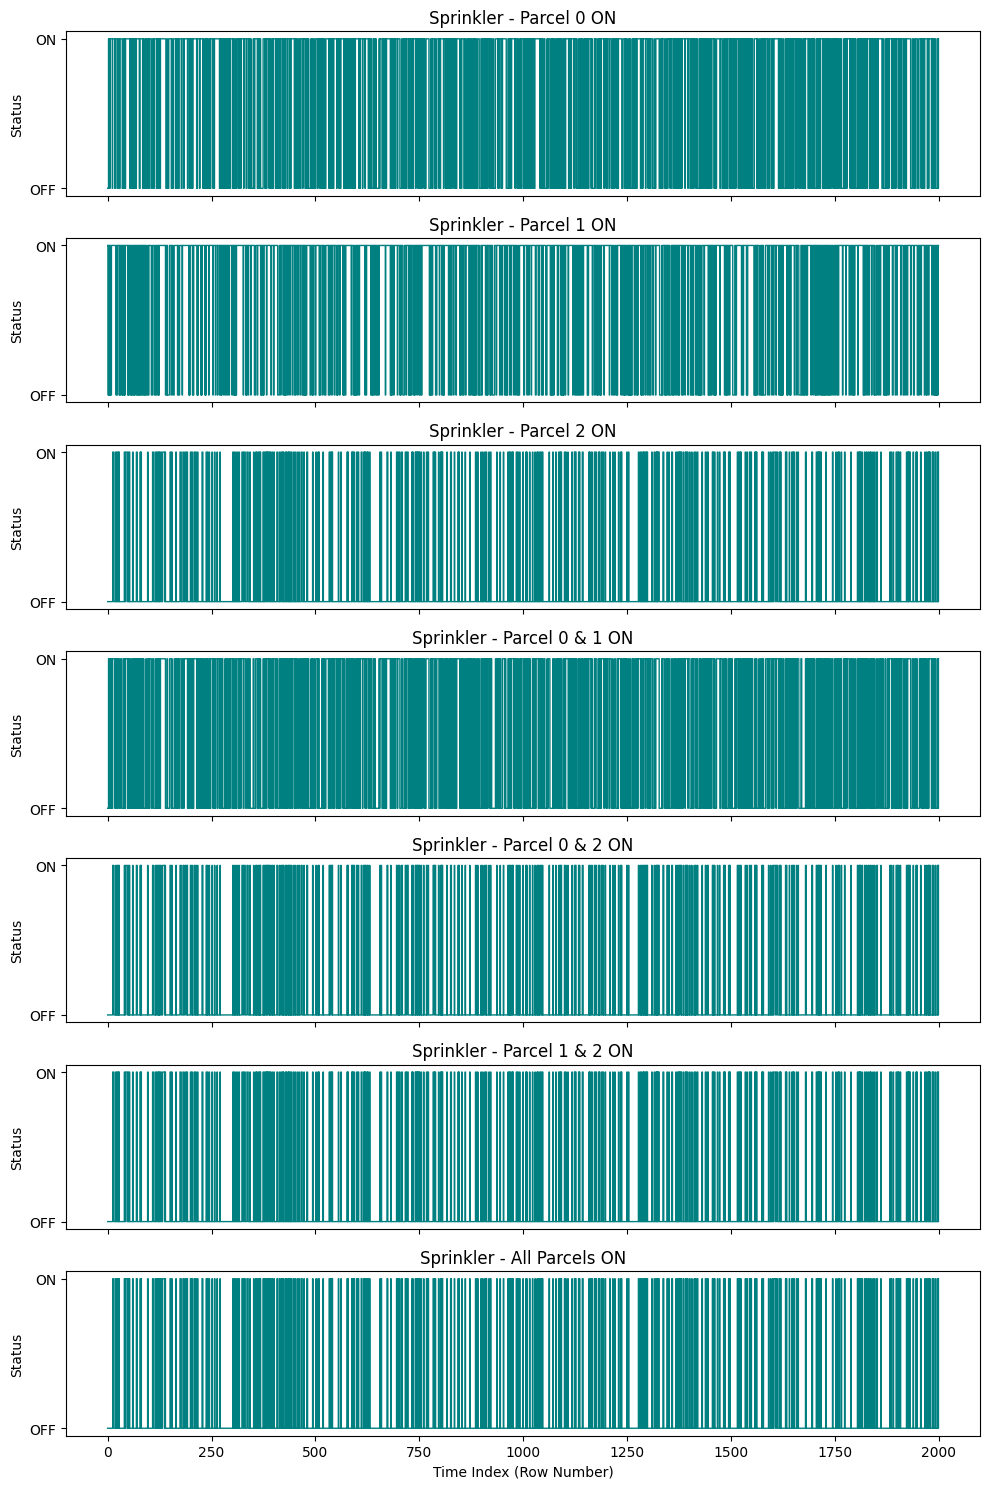

In [163]:
import matplotlib.pyplot as plt

# -------------------------------
# VISUALIZE SPRINKLER PATTERNS
# -------------------------------

# Define parcel activation conditions with descriptive labels
# Each condition is a boolean mask where True means the sprinkler was ON
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

# Create vertically stacked subplots, one for each condition
fig, axs = plt.subplots(nrows=len(conditions), figsize=(10, 15), sharex=True)

# Loop through each condition and plot as a square wave
for ax, (title, condition) in zip(axs, conditions.items()):
    # Convert True/False to 1/0 using astype(int)
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='teal')
    ax.set_title(f"Sprinkler - {title}")  # Title for each subplot
    ax.set_ylabel("Status")               # Y-axis label
    ax.set_yticks([0, 1])                 # Y-axis ticks: OFF (0), ON (1)
    ax.set_yticklabels(['OFF', 'ON'])     # Tick labels

# Label the x-axis only on the last plot
axs[-1].set_xlabel("Time Index (Row Number)")

# Display the plots
plt.tight_layout()
plt.show()


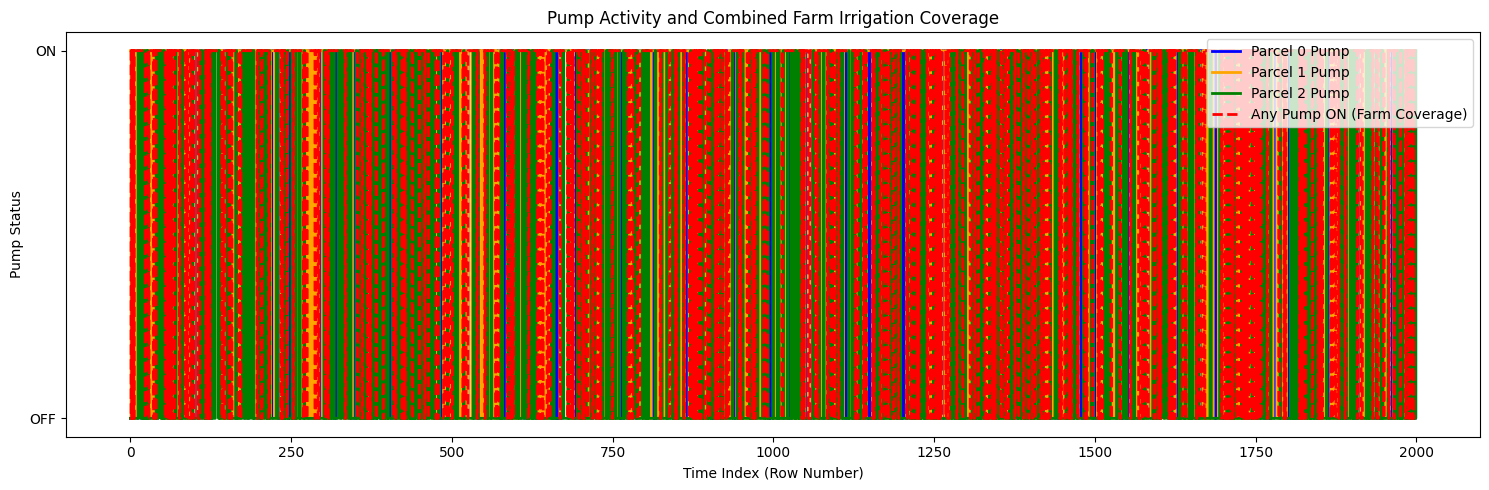

In [164]:
# -------------------------------
# VISUALIZE INDIVIDUAL PUMP ACTIVITY + OVERALL FARM COVERAGE
# -------------------------------
# This plot shows when each pump (Parcel 0, 1, and 2) is ON or OFF across time.
# It also visualizes when *any* pump is active (combined farm irrigation coverage).

# Calculate combined pump activity — True if any parcel pump is ON at a time
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

# Create a wide figure for better visibility of all parcel pumps and combined coverage
plt.figure(figsize=(15, 5))

# Plot ON/OFF timeline for each parcel's pump as square waves
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')

# Plot a dashed red line to show when ANY pump is ON (combined irrigation coverage)
plt.step(
    df.index, any_pump_on.astype(int),
    where='post', linewidth=2, linestyle='--',
    label='Any Pump ON (Farm Coverage)', color='red'
)

# Add chart title and axis labels for clarity
plt.title("Pump Activity and Combined Farm Irrigation Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Pump Status")

# Set y-axis ticks to 'OFF' (0) and 'ON' (1) for intuitive interpretation
plt.yticks([0, 1], ['OFF', 'ON'])

# Show a legend (upper right) for curve/pump meaning
plt.legend(loc='upper right')

# Adjust layout so labels/titles do not overlap
plt.tight_layout()
plt.show()


In [165]:
# -------------------------------
# SAVE TRAINED MODEL
# -------------------------------
# Save the trained Random Forest + preprocessing pipeline so you can reuse the entire workflow later
# (No need to retrain! Just load this file for predictions/deployment.)

import joblib
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and the trained multi-label classifier
pipeline = Pipeline([
    ('scaler', scaler),   # Reuse the fitted scaler from earlier (ensures test data is scaled identically)
    ('model', model)      # Trained (Random Forest in MultiOutputClassifier wrapper)
])

# Save the whole pipeline to a file for easy loading/sharing
joblib.dump(pipeline, "Farm_Irrigation_System.pkl")

print("Model saved as Farm_Irrigation_System.pkl")


Model saved as Farm_Irrigation_System.pkl
